## Problema 1: Rotatividade de Funcionários

Temos observado uma alta taxa de rotatividade de funcionários em determinados departamentos. Gostaria que você investigasse os fatores que podem estar contribuindo para essa rotatividade, como:

- Departamentos com maior rotatividade
- Faixa etária dos funcionários que estão saindo
- Tempo de serviço dos funcionários que estão deixando a empresa
- Possíveis correlações com salários, benefícios ou outras variáveis

## Problema 2: Desempenho e Produtividade

Alguns gerentes têm relatado preocupações sobre o desempenho e a produtividade de suas equipes. Gostaria que você explorasse os dados para identificar possíveis fatores que possam estar influenciando o desempenho, como:

- Relação entre horas extras e produtividade
- Diferenças de desempenho entre departamentos ou funções

# 1.0 IMPORTS

In [1]:
import pandas                   as pd
import numpy                    as np
import matplotlib.pyplot        as plt
import seaborn                  as sns
from scipy                      import stats  as ss

from sklearn.metrics            import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing      import StandardScaler
from sklearn.ensemble           import RandomForestClassifier
from sklearn.model_selection    import train_test_split
from sklearn.linear_model       import LogisticRegression
from sklearn.metrics            import classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

## 1.1 Loading Data

In [2]:
df1 = pd.read_csv('HR_Analytics.csv')
df1.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


## Helper Functions

In [3]:
def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).to_numpy()
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = ss.chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )


# 2.0 DATA DESCRIPTION

Q: What's mean columns?
<br>Q: How can I solve the problem 1?

A: I need mind map of hyphotesis for me create and solve my questions.

In [4]:
df2 = df1.copy()

## 2.1 Lowercase columns

In [5]:
df2.columns = [x.lower() for x in df2.columns] # columns lowercase letters

## 2.2 Data Dimension

In [6]:
print('Columns:', df2.shape[1])
print('Rows:', df2.shape[0])

Columns: 38
Rows: 1480


## 2.3 Data Types

To make changes I need understand my datas.

In [7]:
df2.dtypes

empid                        object
age                           int64
agegroup                     object
attrition                    object
businesstravel               object
dailyrate                     int64
department                   object
distancefromhome              int64
education                     int64
educationfield               object
employeecount                 int64
employeenumber                int64
environmentsatisfaction       int64
gender                       object
hourlyrate                    int64
jobinvolvement                int64
joblevel                      int64
jobrole                      object
jobsatisfaction               int64
maritalstatus                object
monthlyincome                 int64
salaryslab                   object
monthlyrate                   int64
numcompaniesworked            int64
over18                       object
overtime                     object
percentsalaryhike             int64
performancerating           

## 2.4 Check NA

In [8]:
df2.isnull().sum()

empid                        0
age                          0
agegroup                     0
attrition                    0
businesstravel               0
dailyrate                    0
department                   0
distancefromhome             0
education                    0
educationfield               0
employeecount                0
employeenumber               0
environmentsatisfaction      0
gender                       0
hourlyrate                   0
jobinvolvement               0
joblevel                     0
jobrole                      0
jobsatisfaction              0
maritalstatus                0
monthlyincome                0
salaryslab                   0
monthlyrate                  0
numcompaniesworked           0
over18                       0
overtime                     0
percentsalaryhike            0
performancerating            0
relationshipsatisfaction     0
standardhours                0
stockoptionlevel             0
totalworkingyears            0
training

I have just 57 nulls data. Then, I can just exclude it.

### 2.4.1 Exclude NULL

In [9]:
df2.yearswithcurrmanager.fillna(0, inplace=True)

## 2.5 Change Types

In this project cycle I will opt for the quick response, in the next cycle after improving the result I will see what can be done in relation to this step.

# 3.0 Descriptive Statistical

In [10]:
df3 = df2.copy()

In [11]:
num_attrs = df3.select_dtypes(include=['int64', 'int32',  'float64'])
cat_attrs = df3.select_dtypes(exclude=['int32', 'int64', 'float64', 'datetime64[ns]'])

## 3.1 Numerical Attributes

In [12]:
ct1 = pd.DataFrame(num_attrs.apply(np.mean)).T
ct2 = pd.DataFrame(num_attrs.apply(np.median)).T

d1 = pd.DataFrame(num_attrs.apply(np.std)).T
d2 = pd.DataFrame(num_attrs.apply(min)).T
d3 = pd.DataFrame(num_attrs.apply(max)).T
d4 = pd.DataFrame(num_attrs.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attrs.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attrs.apply(lambda x: x.kurtosis())).T

m = pd.concat([d2,d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attrs', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attrs,min,max,range,mean,median,std,skew,kurtosis
0,age,18.0,60.0,42.0,36.917568,36.0,9.125475,0.414355,-0.405114
1,dailyrate,102.0,1499.0,1397.0,801.384459,800.0,402.990774,0.000246,-1.201903
2,distancefromhome,1.0,29.0,28.0,9.220270,7.0,8.128453,0.956145,-0.237142
3,education,1.0,5.0,4.0,2.910811,3.0,1.023450,-0.290327,-0.556773
4,employeecount,1.0,1.0,0.0,1.000000,1.0,0.000000,0.000000,0.000000
5,employeenumber,1.0,2068.0,2067.0,1031.860811,1027.5,605.750297,0.015234,-1.224390
6,environmentsatisfaction,1.0,4.0,3.0,2.724324,3.0,1.092210,-0.322294,-1.201550
7,hourlyrate,30.0,100.0,70.0,65.845270,66.0,20.321397,-0.031804,-1.195964
8,jobinvolvement,1.0,4.0,3.0,2.729730,3.0,0.712766,-0.484030,0.246918
9,joblevel,1.0,5.0,4.0,2.064865,2.0,1.105201,1.022990,0.397651


# 4.0 FEATURE ENGINEERING

In [167]:
df4 = df3.copy()

create mind map of hyphotesis

<img src='Mind Map.jpg'>

## Creating new Features

In [168]:
df4['attrition_encoded'] = df4['attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [169]:
# Features relacionada a Tempo
df4['agecurrentposition'] = df4['yearsatcompany'] - df4['yearsincurrentrole'] # idade no cargo atual
df4['agelastpromotion'] = df4['age'] - df4['yearssincelastpromotion'] # idade da ultima promoção 
df4['hours_worked_per_week'] = df4['standardhours'] + df4['overtime'].apply(lambda x: 10 if x == 'Yes' else 0) # horas trabalhada por semana. Se faz hora extra, 10 horas a mais. 

# Features relacionada a Proporção
df4['salary/hoursworked'] = df4['monthlyincome'] / df4['hours_worked_per_week'] # relação horas trabalhadas/salario
df4['training/yearsatcompany'] = df4['trainingtimeslastyear'] / df4['yearsatcompany'] # relação treinamento/tempo de casa

df4['totalsatisfaction'] = ( df4['environmentsatisfaction'] + df4['jobsatisfaction'] + df4['relationshipsatisfaction'] ) / 3

In [170]:
pessoas_cols = df4[['empid', 'gender', 'maritalstatus', 'agegroup', 'over18', 'age', 'distancefromhome', 'attrition']]
emprego_cols = df4[['employeecount', 'employeenumber', 'joblevel', 'jobrole', 'yearsatcompany', 'yearsincurrentrole', 'yearswithcurrmanager', 'yearssincelastpromotion', 'businesstravel', 'department', 'standardhours', 'overtime','hours_worked_per_week', 'agecurrentposition', 'agelastpromotion', 'salary/hoursworked', 'attrition']]
renda_beneficios_cols = df4[['dailyrate', 'hourlyrate', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'percentsalaryhike', 'salaryslab', 'stockoptionlevel', 'totalworkingyears', 'attrition']]
educacao_treinamento_cols = df4[['education', 'educationfield', 'trainingtimeslastyear','training/yearsatcompany', 'attrition']]
satisfacao_desenvolvimento_cols = df4[['environmentsatisfaction', 'jobinvolvement', 'relationshipsatisfaction', 'worklifebalance', 'jobsatisfaction', 'performancerating', 'totalsatisfaction', 'attrition']]

# 5.0 Data Analysis

## Analysis Response Variable

### Attrition Rate

In [171]:
attrition_rate = df4['attrition'].value_counts(normalize=True) * 100
print(attrition_rate)

attrition
No     83.918919
Yes    16.081081
Name: proportion, dtype: float64


### Attrition por Pessoas

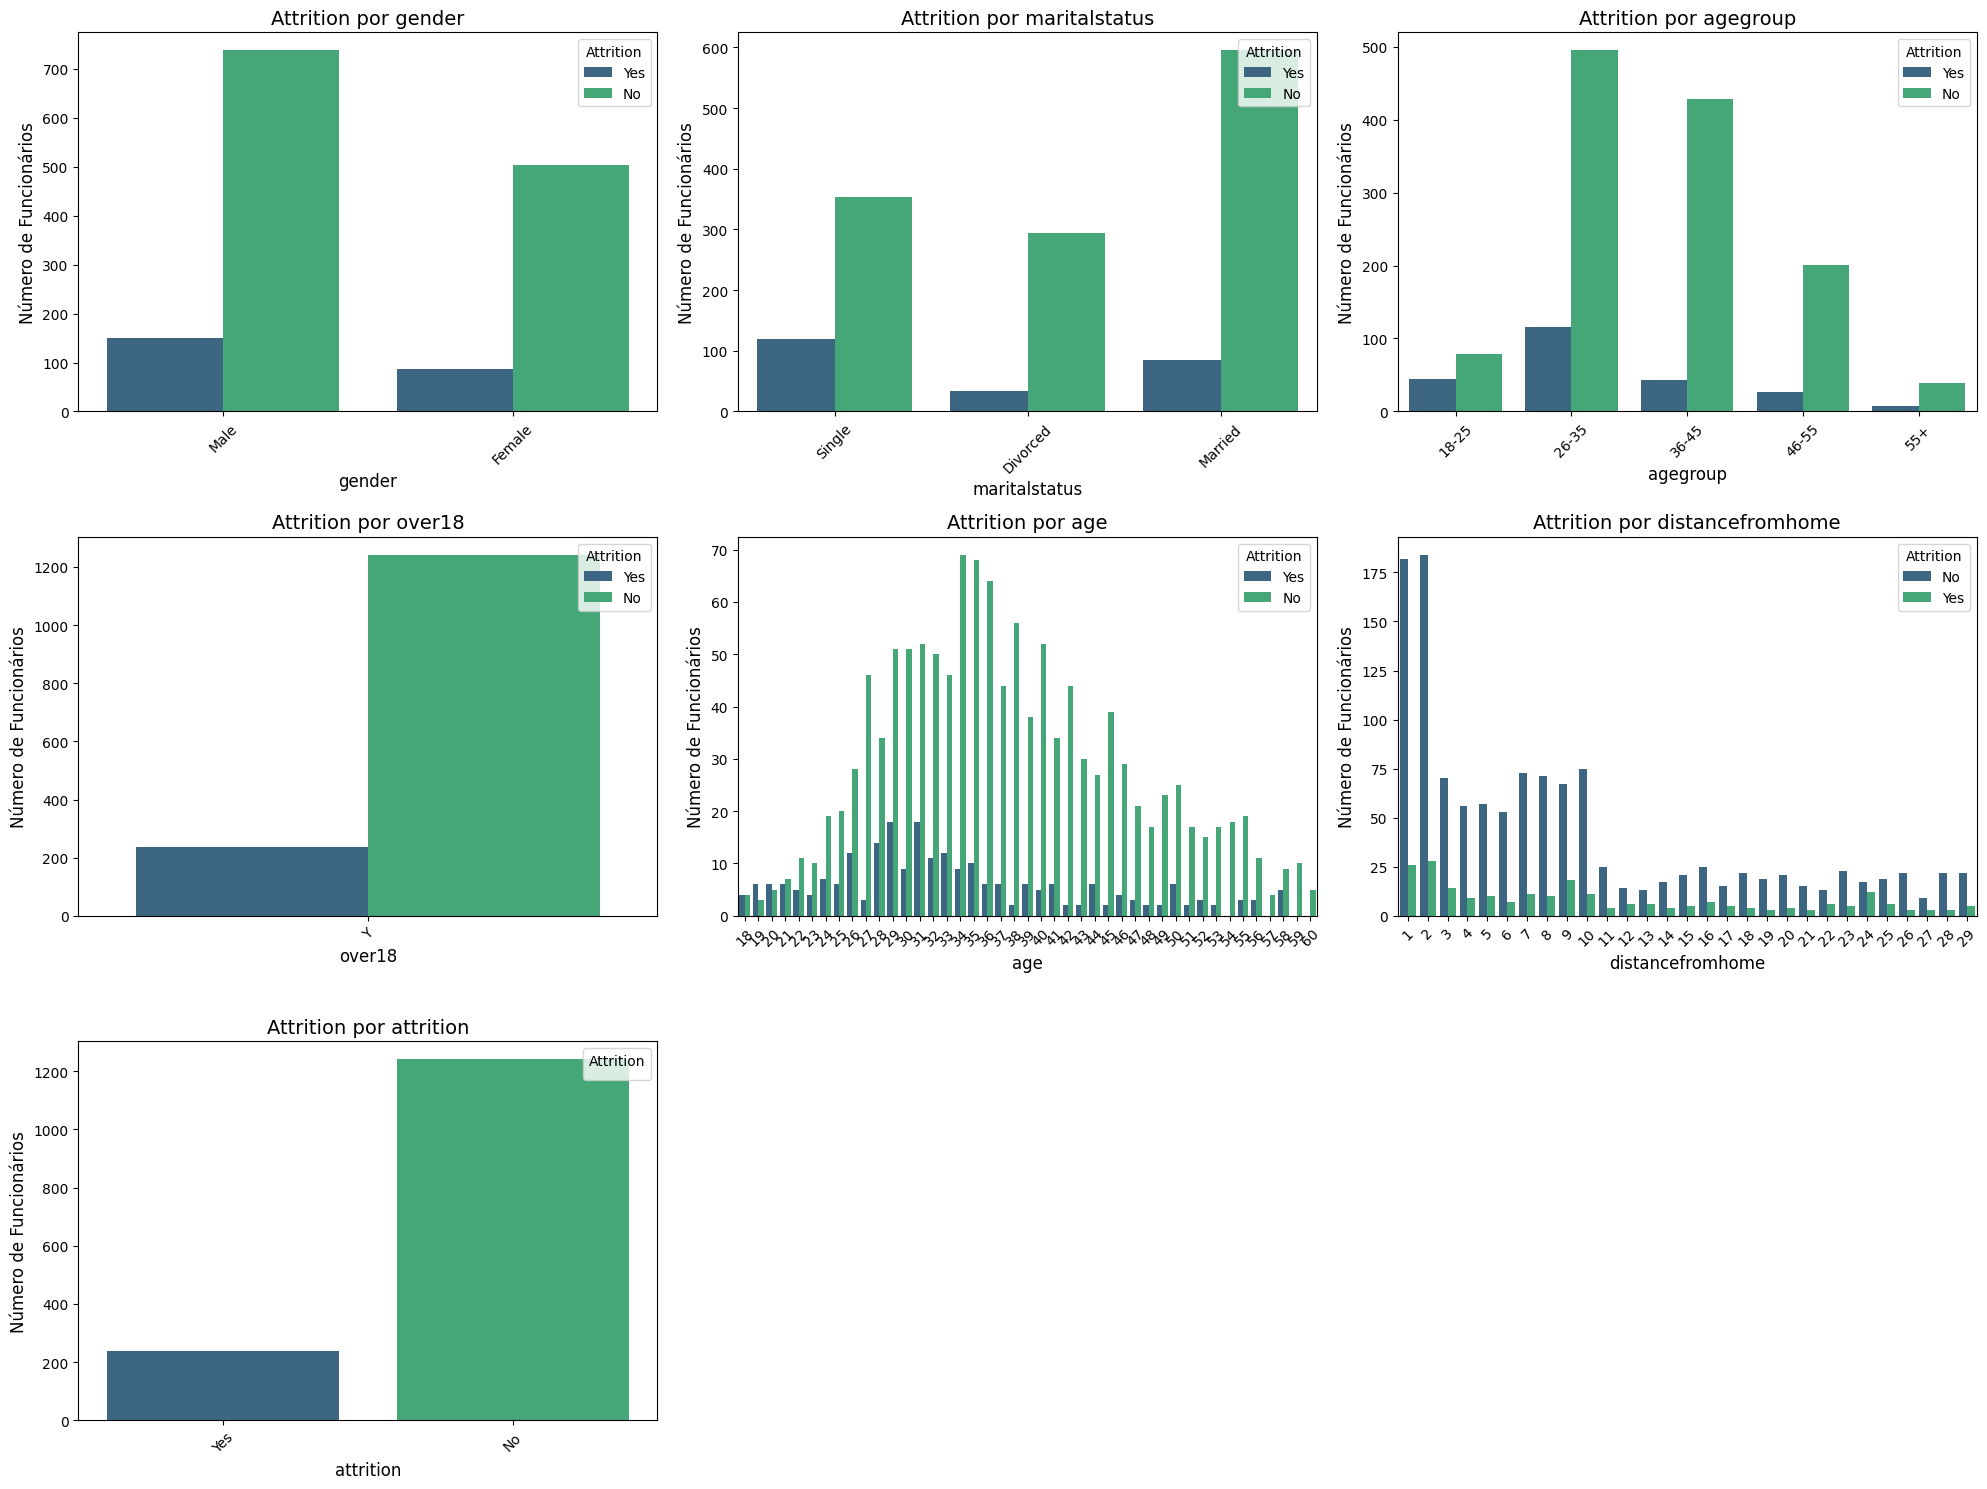

In [172]:
# Configurar o número de colunas e linhas para subplots
columns = pessoas_cols.drop(columns=['empid']).columns
n_cols = 3  # Número de gráficos por linha
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calcular o número de linhas

# Criar a figura e os subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  # Ajustar tamanho da figura
axes = axes.flatten()  # Achatar os eixos para facilitar a iteração

# Iterar pelas colunas e criar gráficos
for i, x in enumerate(columns):
    sns.countplot(data=pessoas_cols, x=x, hue='attrition', palette='viridis', ax=axes[i])
    axes[i].set_title(f'Attrition por {x}', fontsize=14)
    axes[i].set_xlabel(f'{x}', fontsize=12)
    axes[i].set_ylabel('Número de Funcionários', fontsize=12)
    axes[i].legend(title='Attrition', loc='upper right')
    axes[i].tick_params(axis='x', rotation=45)

# Remover gráficos vazios se houver menos colunas que subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Ajustar layout
plt.tight_layout()
plt.show()


### Attrition por Emprego

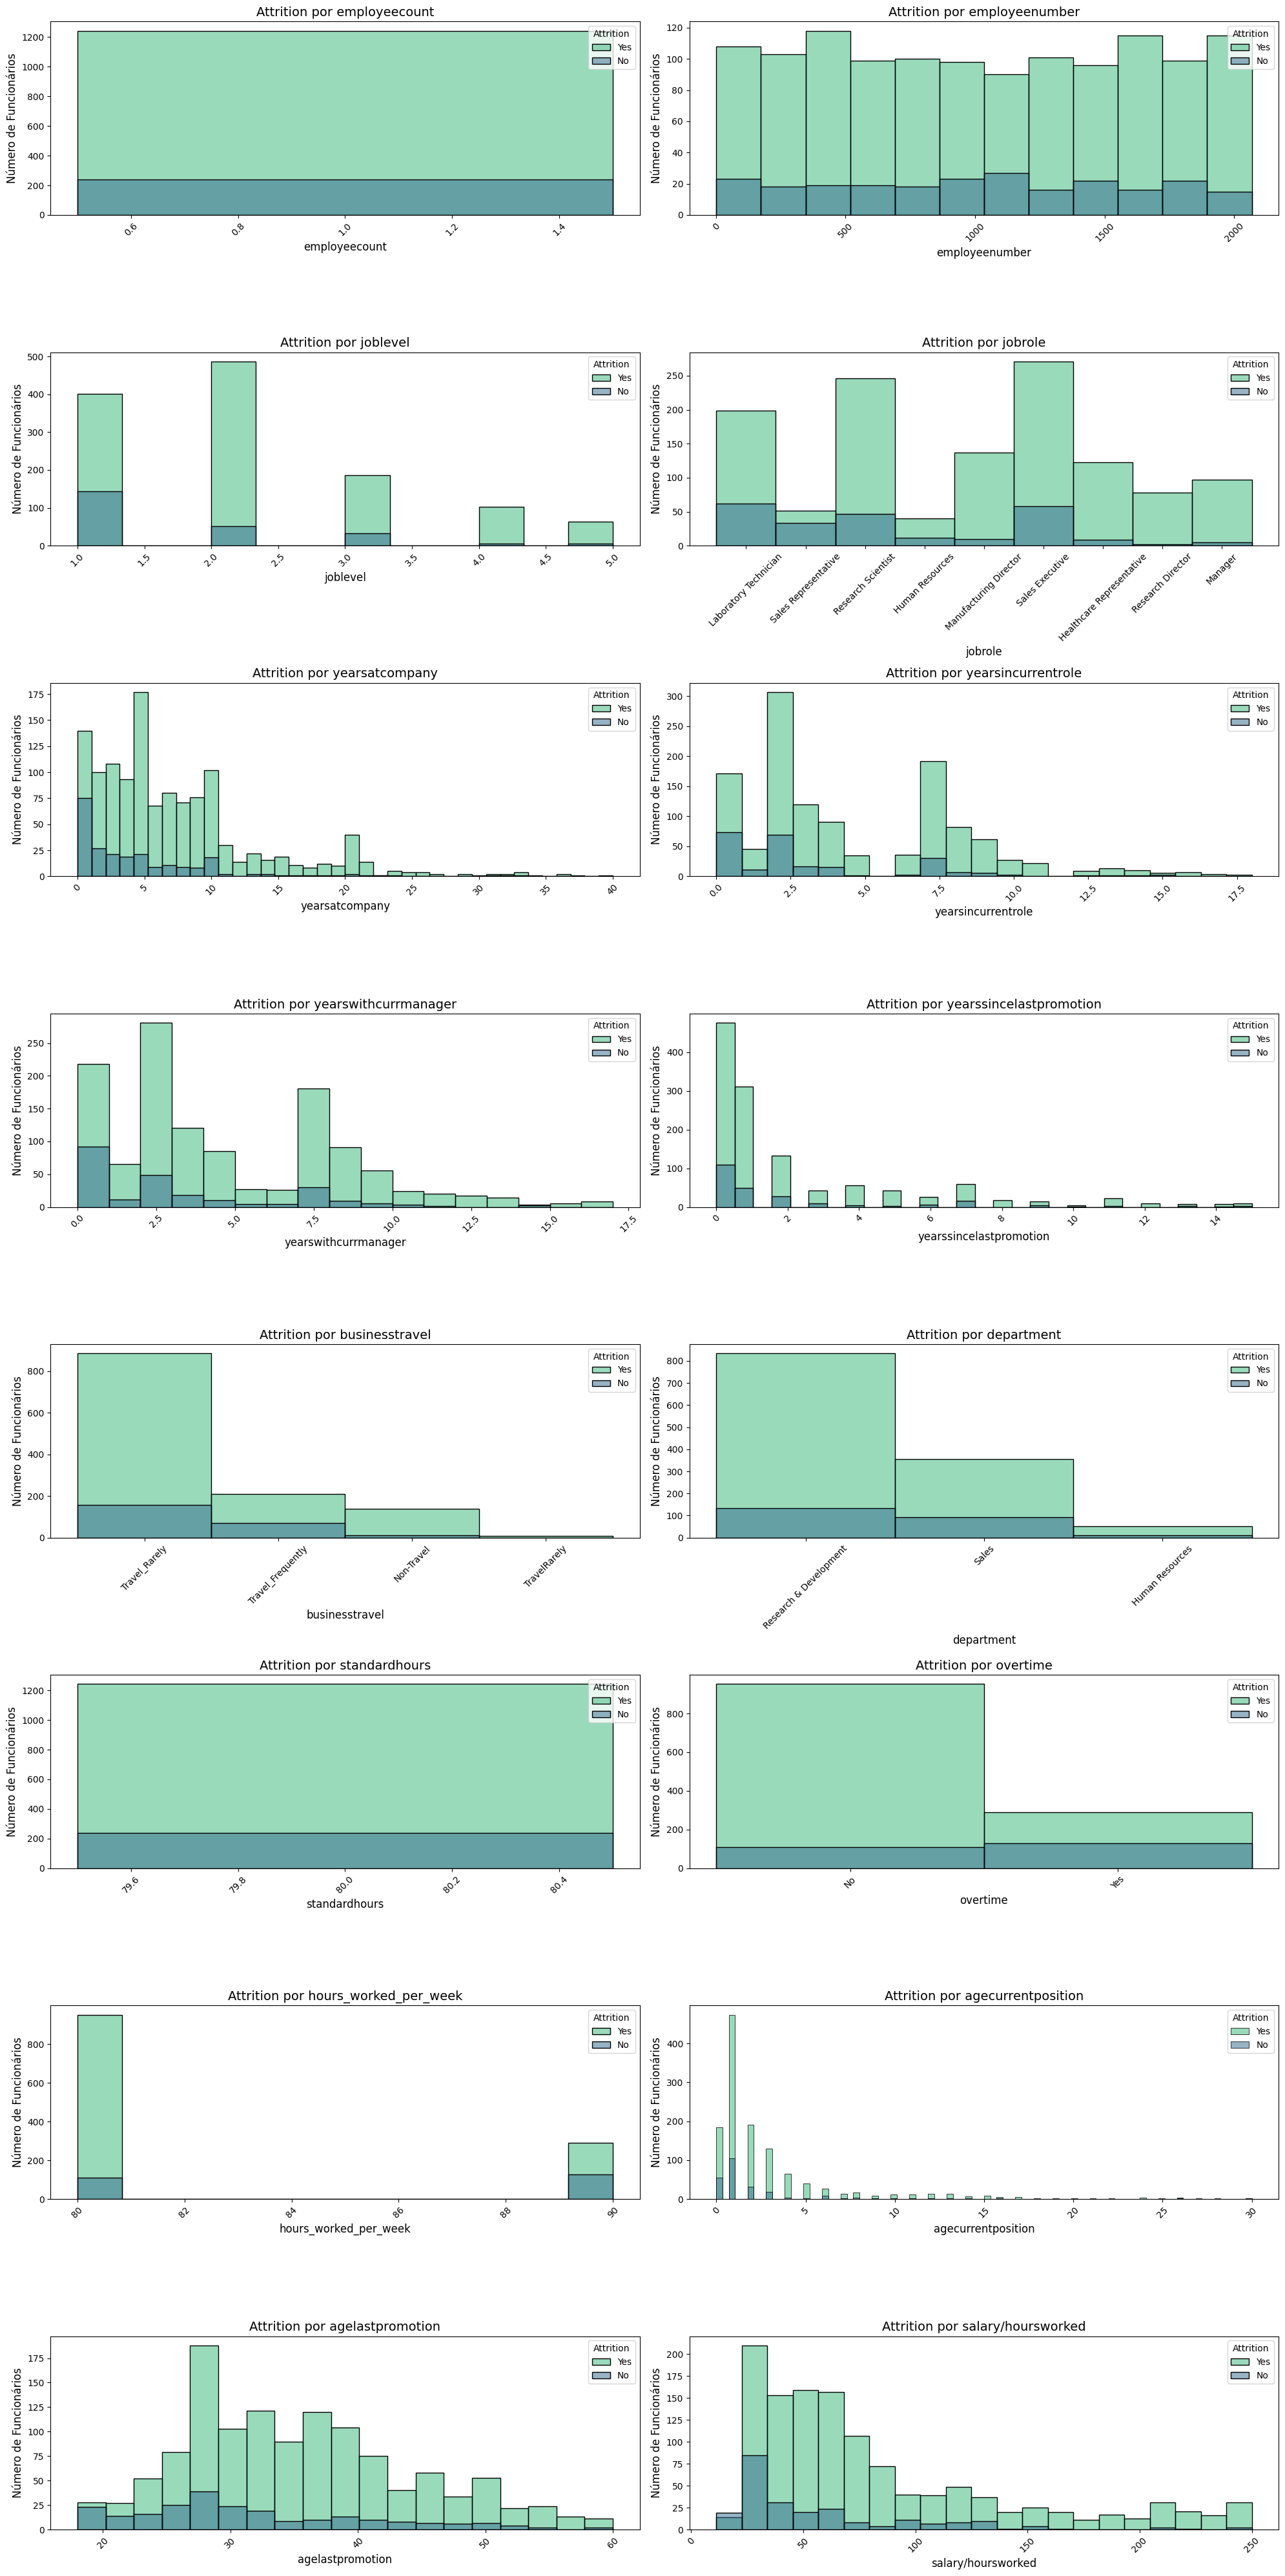

In [173]:
# Configurar o número de colunas e linhas para subplots
columns = emprego_cols.drop(columns=['attrition']).columns
n_cols = 2  # Número de gráficos por linha
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calcular o número de linhas

# Criar a figura e os subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  # Ajustar tamanho da figura
axes = axes.flatten()  # Achatar os eixos para facilitar a iteração

# Iterar pelas colunas e criar gráficos
for i, x in enumerate(columns):
    sns.histplot(data=emprego_cols, x=x, hue='attrition', palette='viridis', ax=axes[i])
    axes[i].set_title(f'Attrition por {x}', fontsize=14)
    axes[i].set_xlabel(f'{x}', fontsize=12)
    axes[i].set_ylabel('Número de Funcionários', fontsize=12)
    axes[i].legend(labels=['Yes', 'No'], title='Attrition', loc='upper right')
    axes[i].tick_params(axis='x', rotation=45)

# Remover gráficos vazios se houver menos colunas que subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Ajustar layout
plt.tight_layout()
plt.show()


### Attrition por Renda e Beneficios

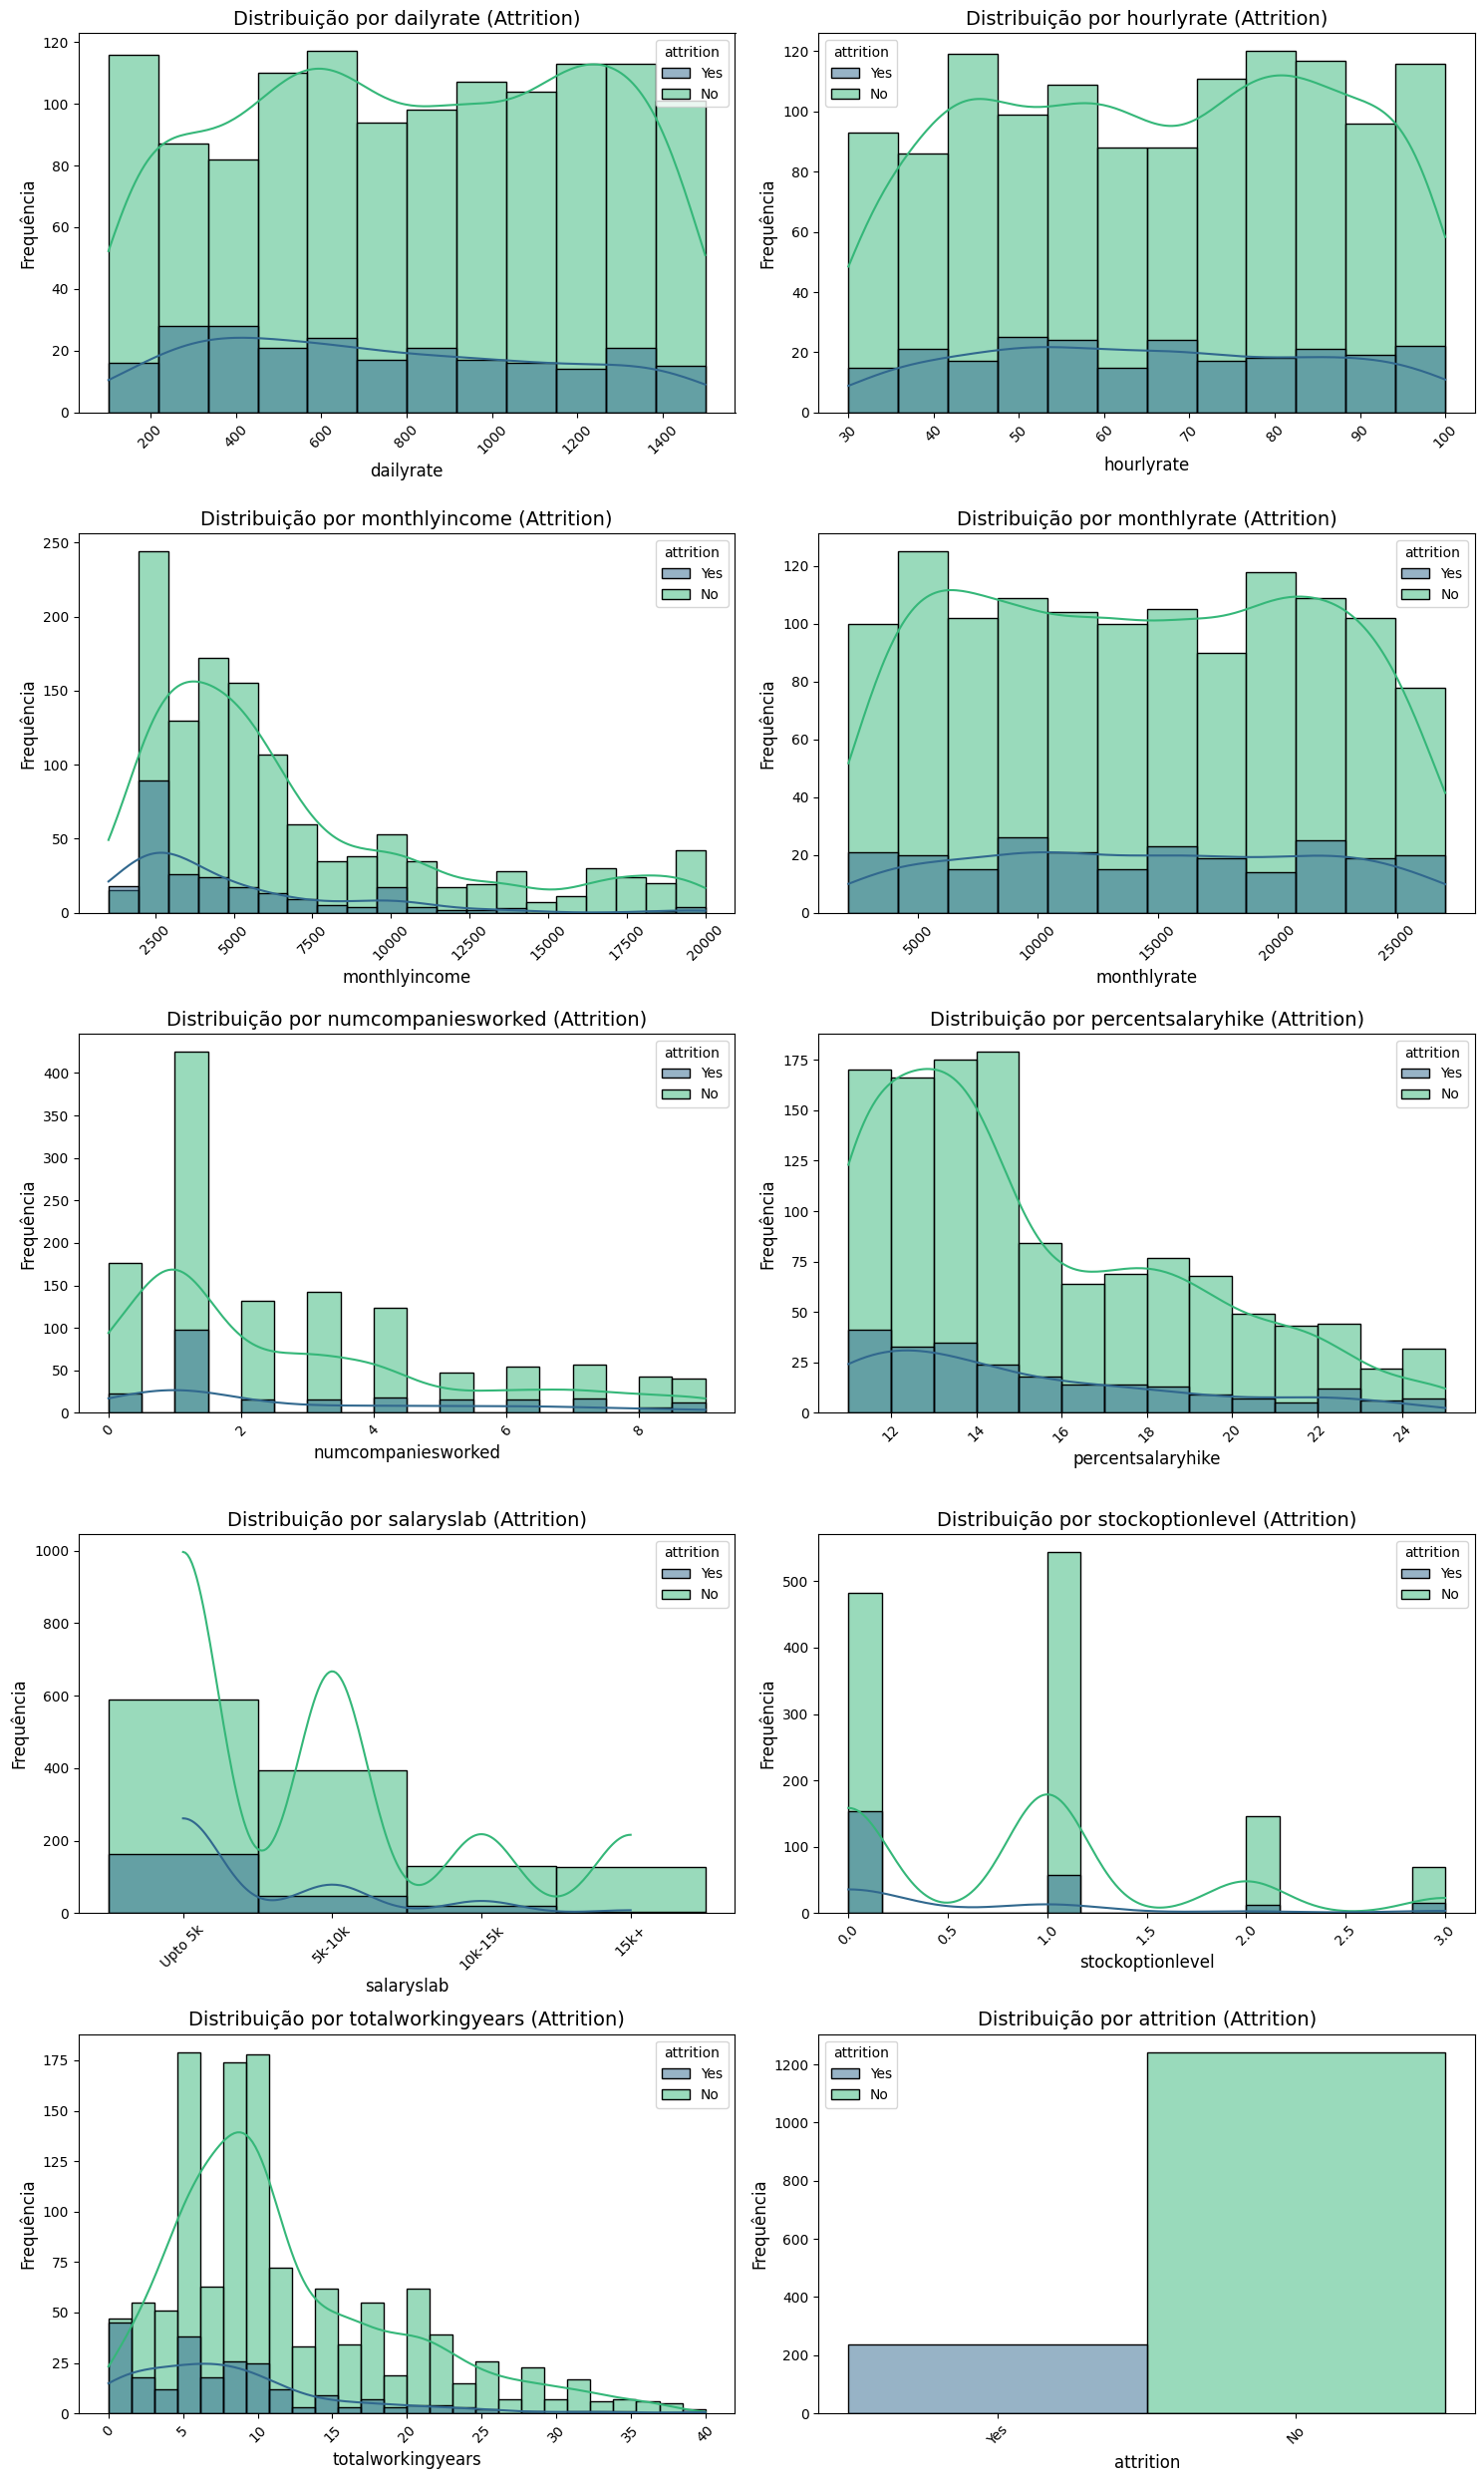

In [174]:
# Configurar o número de colunas e linhas para subplots
columns = renda_beneficios_cols.columns  # Apenas os nomes das colunas
n_cols = 2  # Número de gráficos por linha
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calcular o número de linhas

# Criar a figura e os subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Ajustar tamanho da figura
axes = axes.flatten()  # Achatar os eixos para facilitar a iteração

# Iterar pelas colunas e criar gráficos
for i, x in enumerate(columns):
    sns.histplot(data=renda_beneficios_cols, x=x, hue='attrition', palette='viridis', ax=axes[i], kde=True)
    axes[i].set_title(f'Distribuição por {x} (Attrition)', fontsize=14)
    axes[i].set_xlabel(f'{x}', fontsize=12)
    axes[i].set_ylabel('Frequência', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Remover gráficos vazios se houver menos colunas que subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Ajustar layout
plt.tight_layout()
plt.show()


- Por que pessoas com 1 ano de trabalho sai mais?

### Attrition por Educação e Treinamento

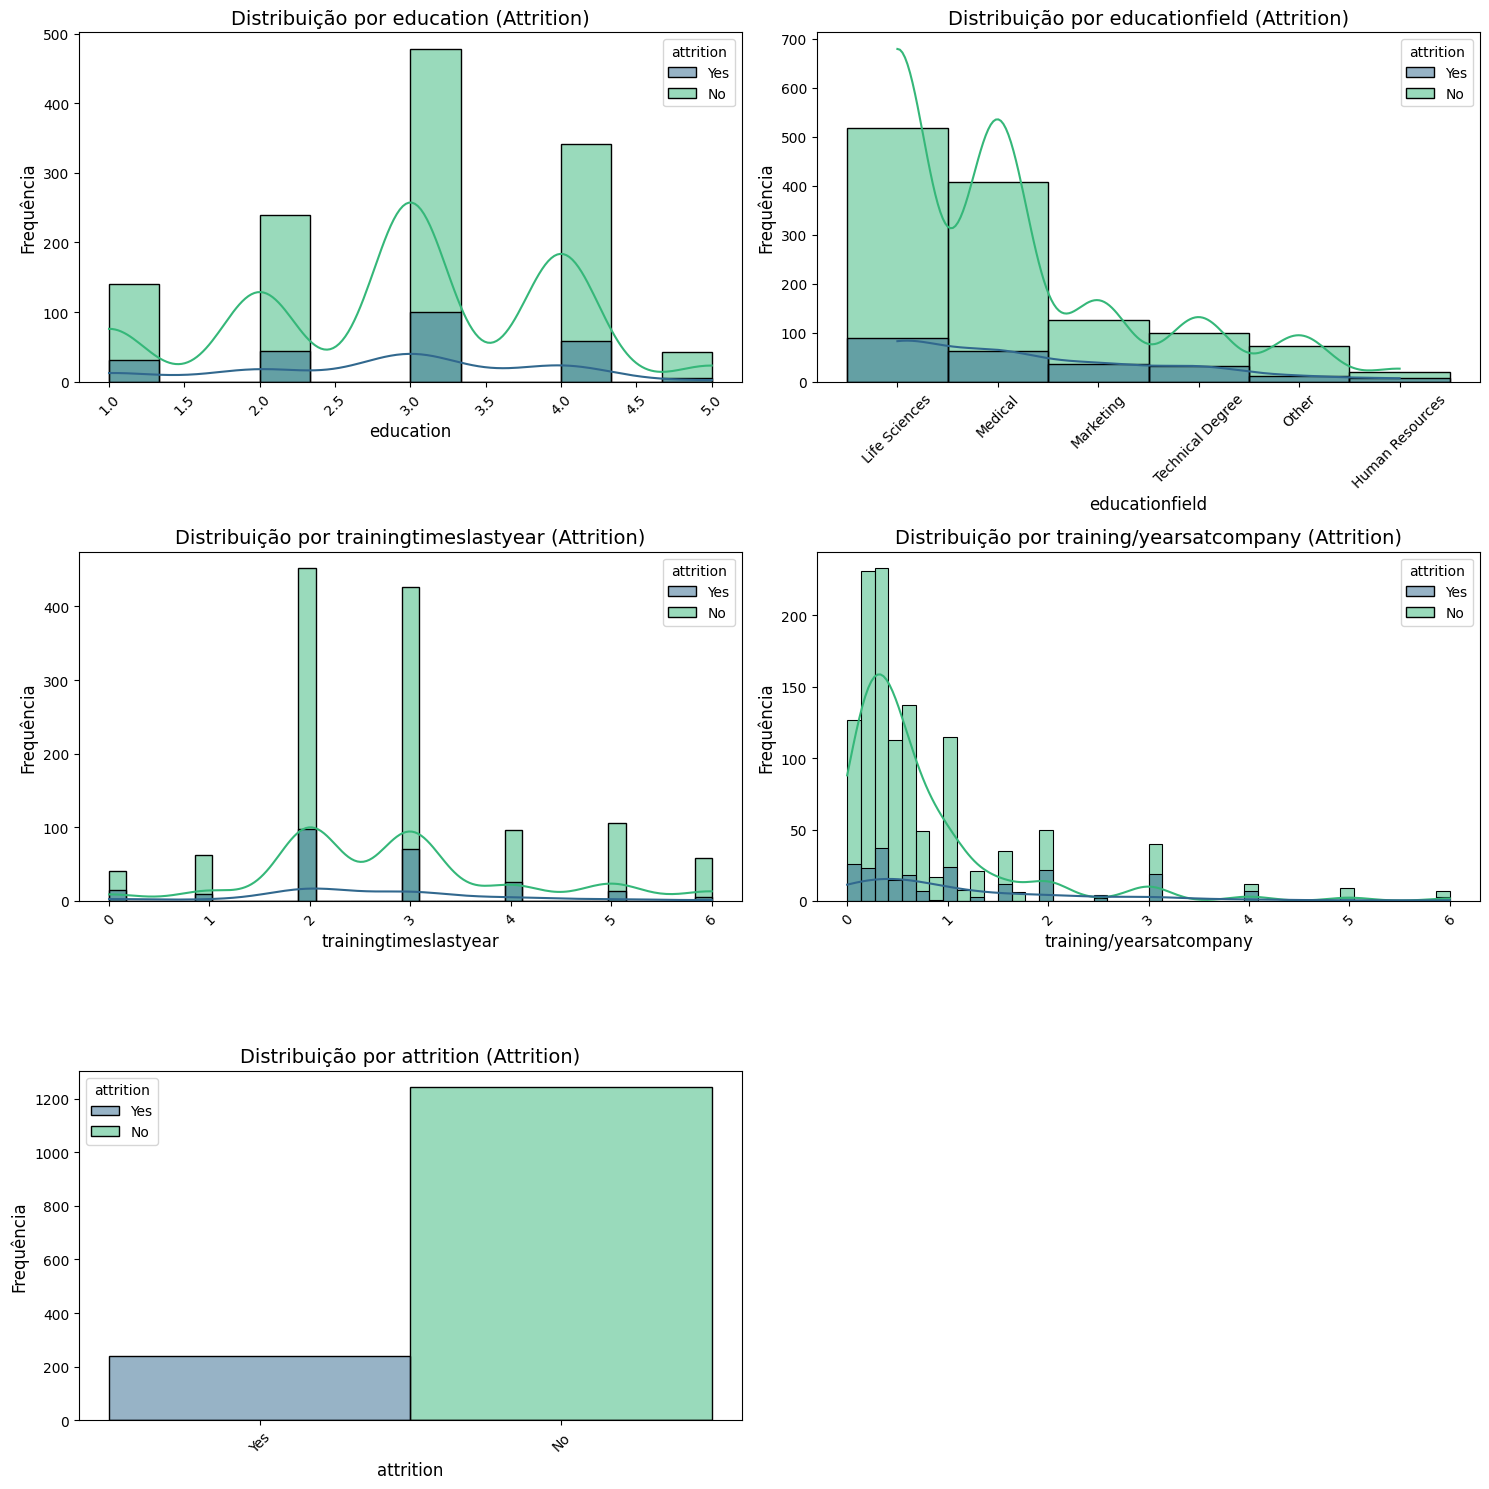

In [175]:
# Configurar o número de colunas e linhas para subplots
columns = educacao_treinamento_cols.columns  # Apenas os nomes das colunas
n_cols = 2  # Número de gráficos por linha
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calcular o número de linhas

# Criar a figura e os subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Ajustar tamanho da figura
axes = axes.flatten()  # Achatar os eixos para facilitar a iteração

# Iterar pelas colunas e criar gráficos
for i, x in enumerate(columns):
    sns.histplot(data=educacao_treinamento_cols, x=x, hue='attrition', palette='viridis', ax=axes[i], kde=True)
    axes[i].set_title(f'Distribuição por {x} (Attrition)', fontsize=14)
    axes[i].set_xlabel(f'{x}', fontsize=12)
    axes[i].set_ylabel('Frequência', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Remover gráficos vazios se houver menos colunas que subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Ajustar layout
plt.tight_layout()
plt.show()


### Attrition por Satisfação e Desenvolvimento

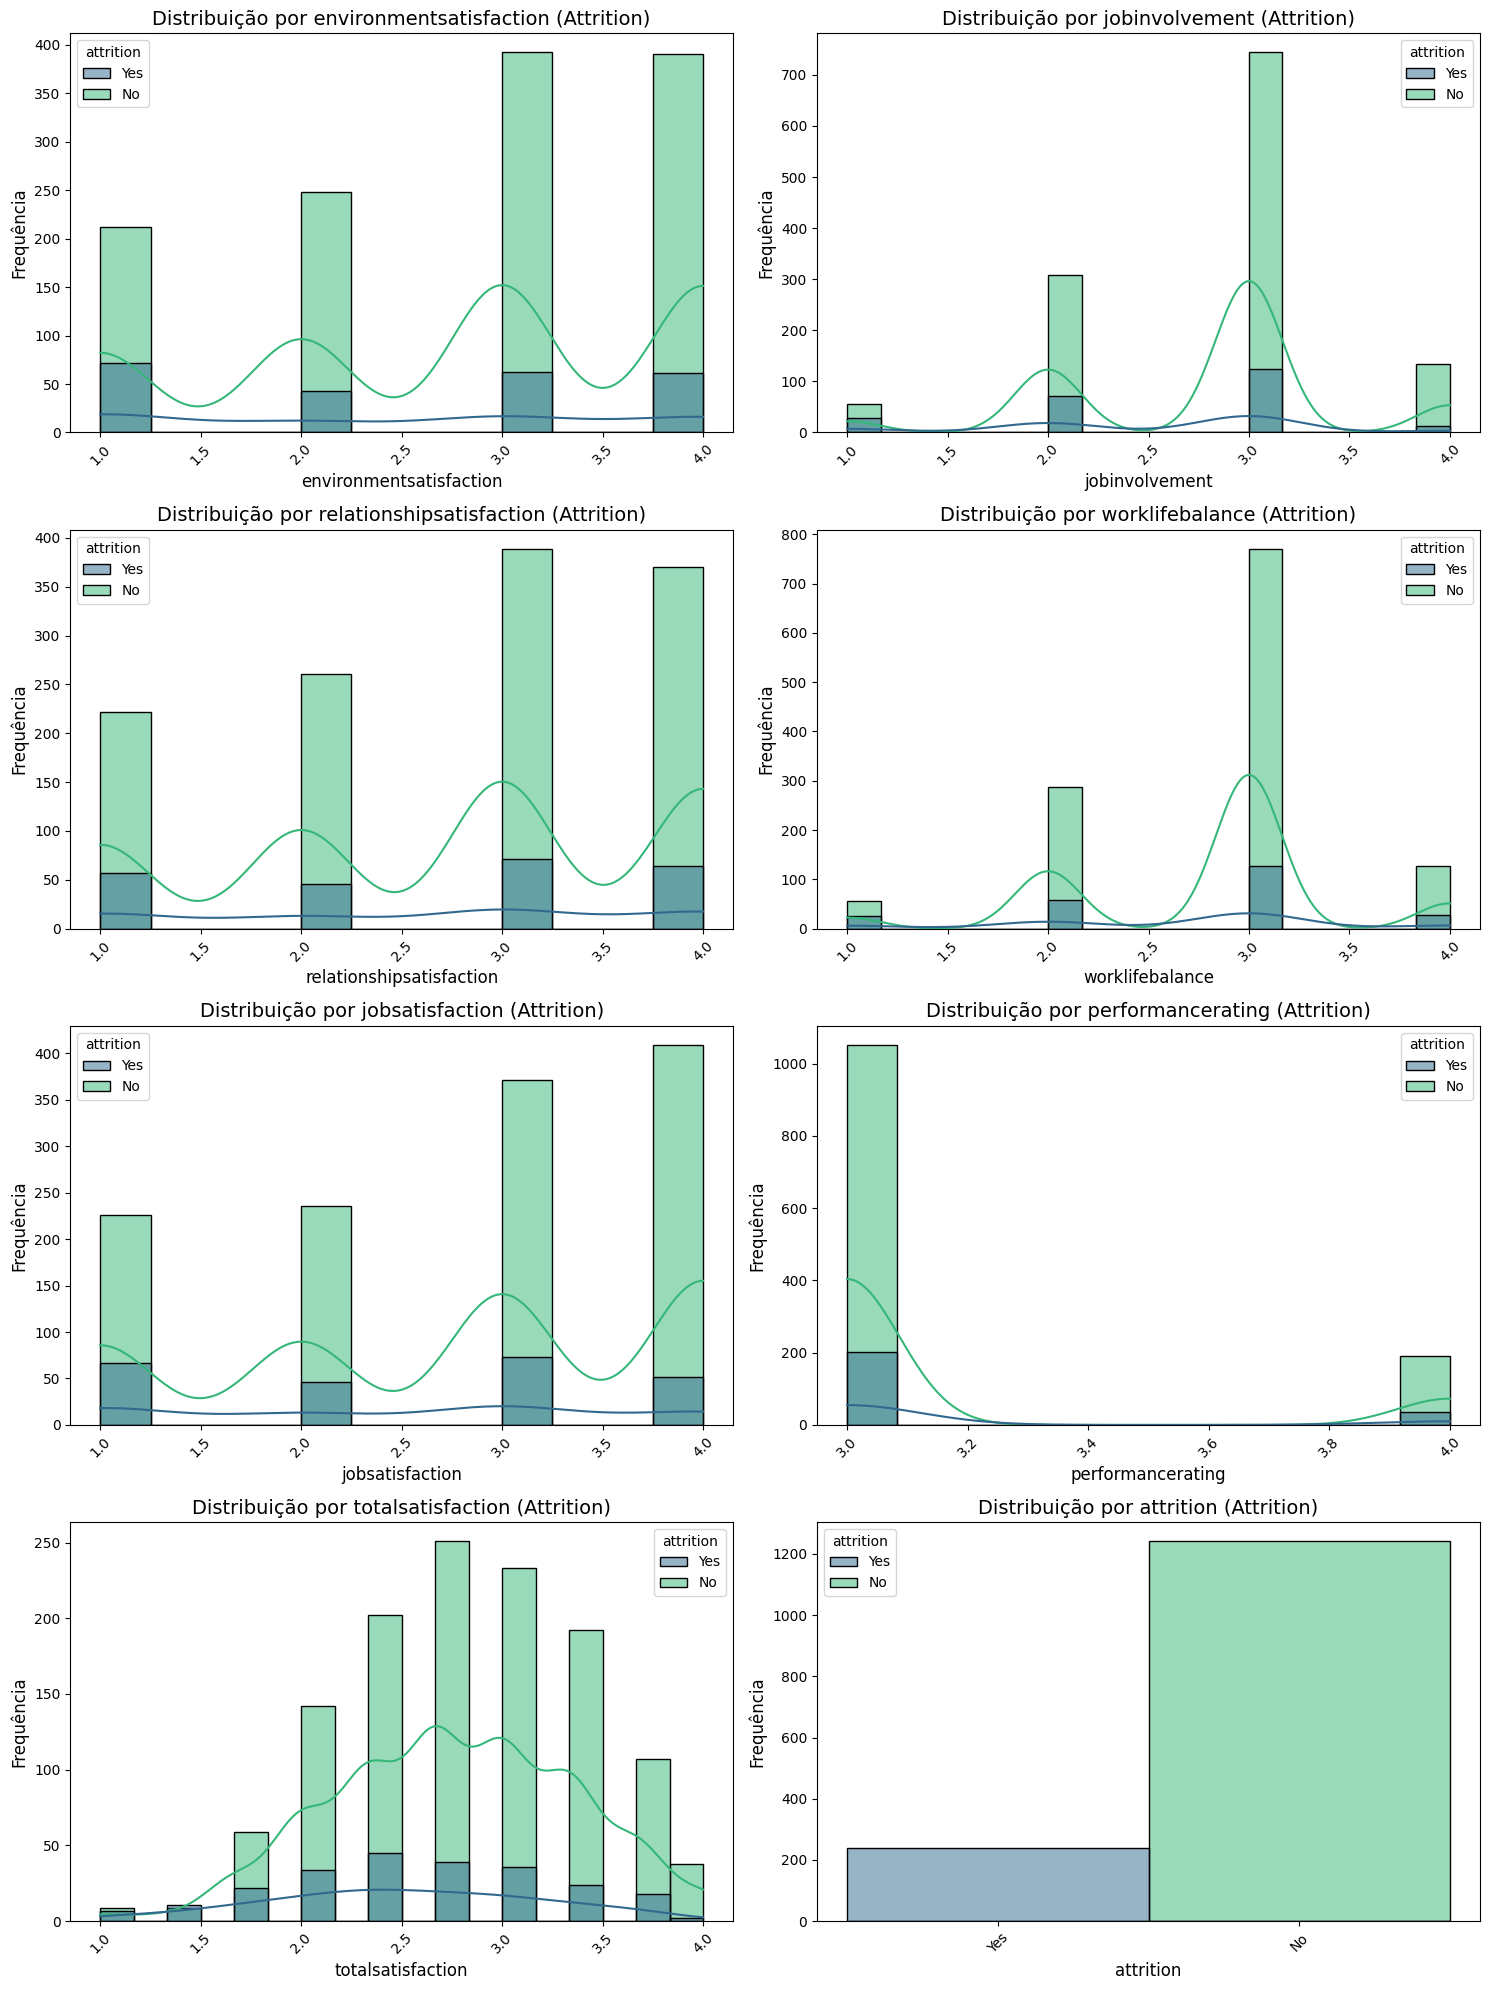

In [176]:
# Configurar o número de colunas e linhas para subplots
columns = satisfacao_desenvolvimento_cols.columns  # Apenas os nomes das colunas
n_cols = 2  # Número de gráficos por linha
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calcular o número de linhas

# Criar a figura e os subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Ajustar tamanho da figura
axes = axes.flatten()  # Achatar os eixos para facilitar a iteração

# Iterar pelas colunas e criar gráficos
for i, x in enumerate(columns):
    sns.histplot(data=satisfacao_desenvolvimento_cols, x=x, hue='attrition', palette='viridis', ax=axes[i], kde=True)
    axes[i].set_title(f'Distribuição por {x} (Attrition)', fontsize=14)
    axes[i].set_xlabel(f'{x}', fontsize=12)
    axes[i].set_ylabel('Frequência', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Remover gráficos vazios se houver menos colunas que subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Ajustar layout
plt.tight_layout()
plt.show()


## Responding to Email

### Problema 1: Rotatividade de Funcionários

#### Departamentos com maior rotatividade

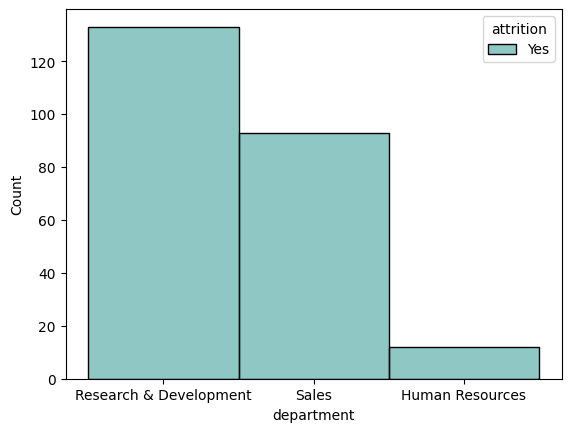

In [177]:
aux = emprego_cols[['department', 'attrition']][emprego_cols['attrition'] == 'Yes']
sns.histplot(data=aux, x=aux['department'], hue='attrition', palette='viridis');

#### Faixa etária dos funcionários que estão saindo

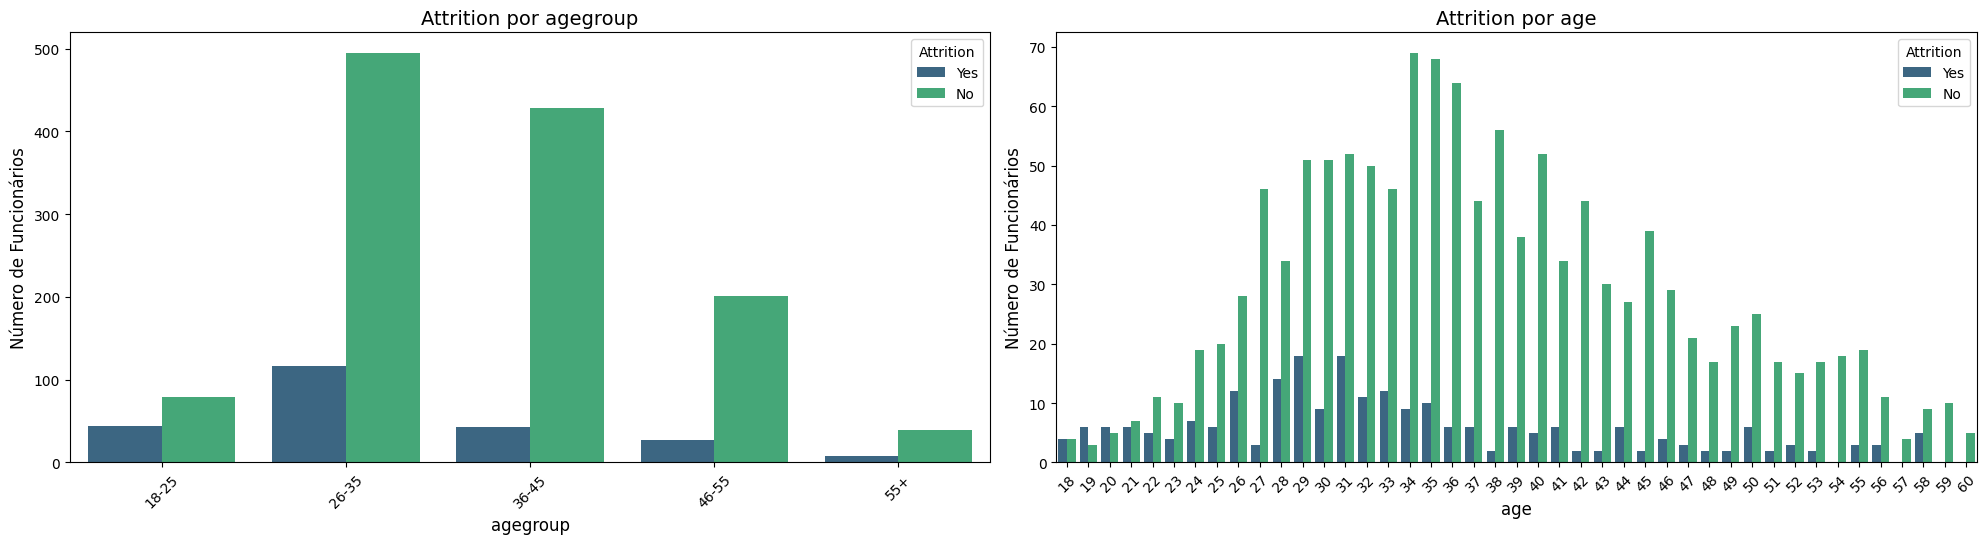

In [178]:
# Configurar o número de colunas e linhas para subplots
aux = pessoas_cols[['agegroup', 'age', 'attrition']]
columns = aux.columns
n_cols = 2  # Número de gráficos por linha
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calcular o número de linhas

# Criar a figura e os subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  # Ajustar tamanho da figura
axes = axes.flatten()  # Achatar os eixos para facilitar a iteração

# Iterar pelas colunas e criar gráficos
for i, x in enumerate(columns):
    if x == 'attrition':
        fig.delaxes(axes[i])
    else:
        sns.countplot(data=aux, x=x, hue='attrition', palette='viridis', ax=axes[i])
        axes[i].set_title(f'Attrition por {x}', fontsize=14)
        axes[i].set_xlabel(f'{x}', fontsize=12)
        axes[i].set_ylabel('Número de Funcionários', fontsize=12)
        axes[i].legend(title='Attrition', loc='upper right')
        axes[i].tick_params(axis='x', rotation=45)

# Remover gráficos vazios se houver menos colunas que subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Ajustar layout
plt.tight_layout()
plt.show()


#### Tempo de serviço dos funcionários que estão deixando a empresa

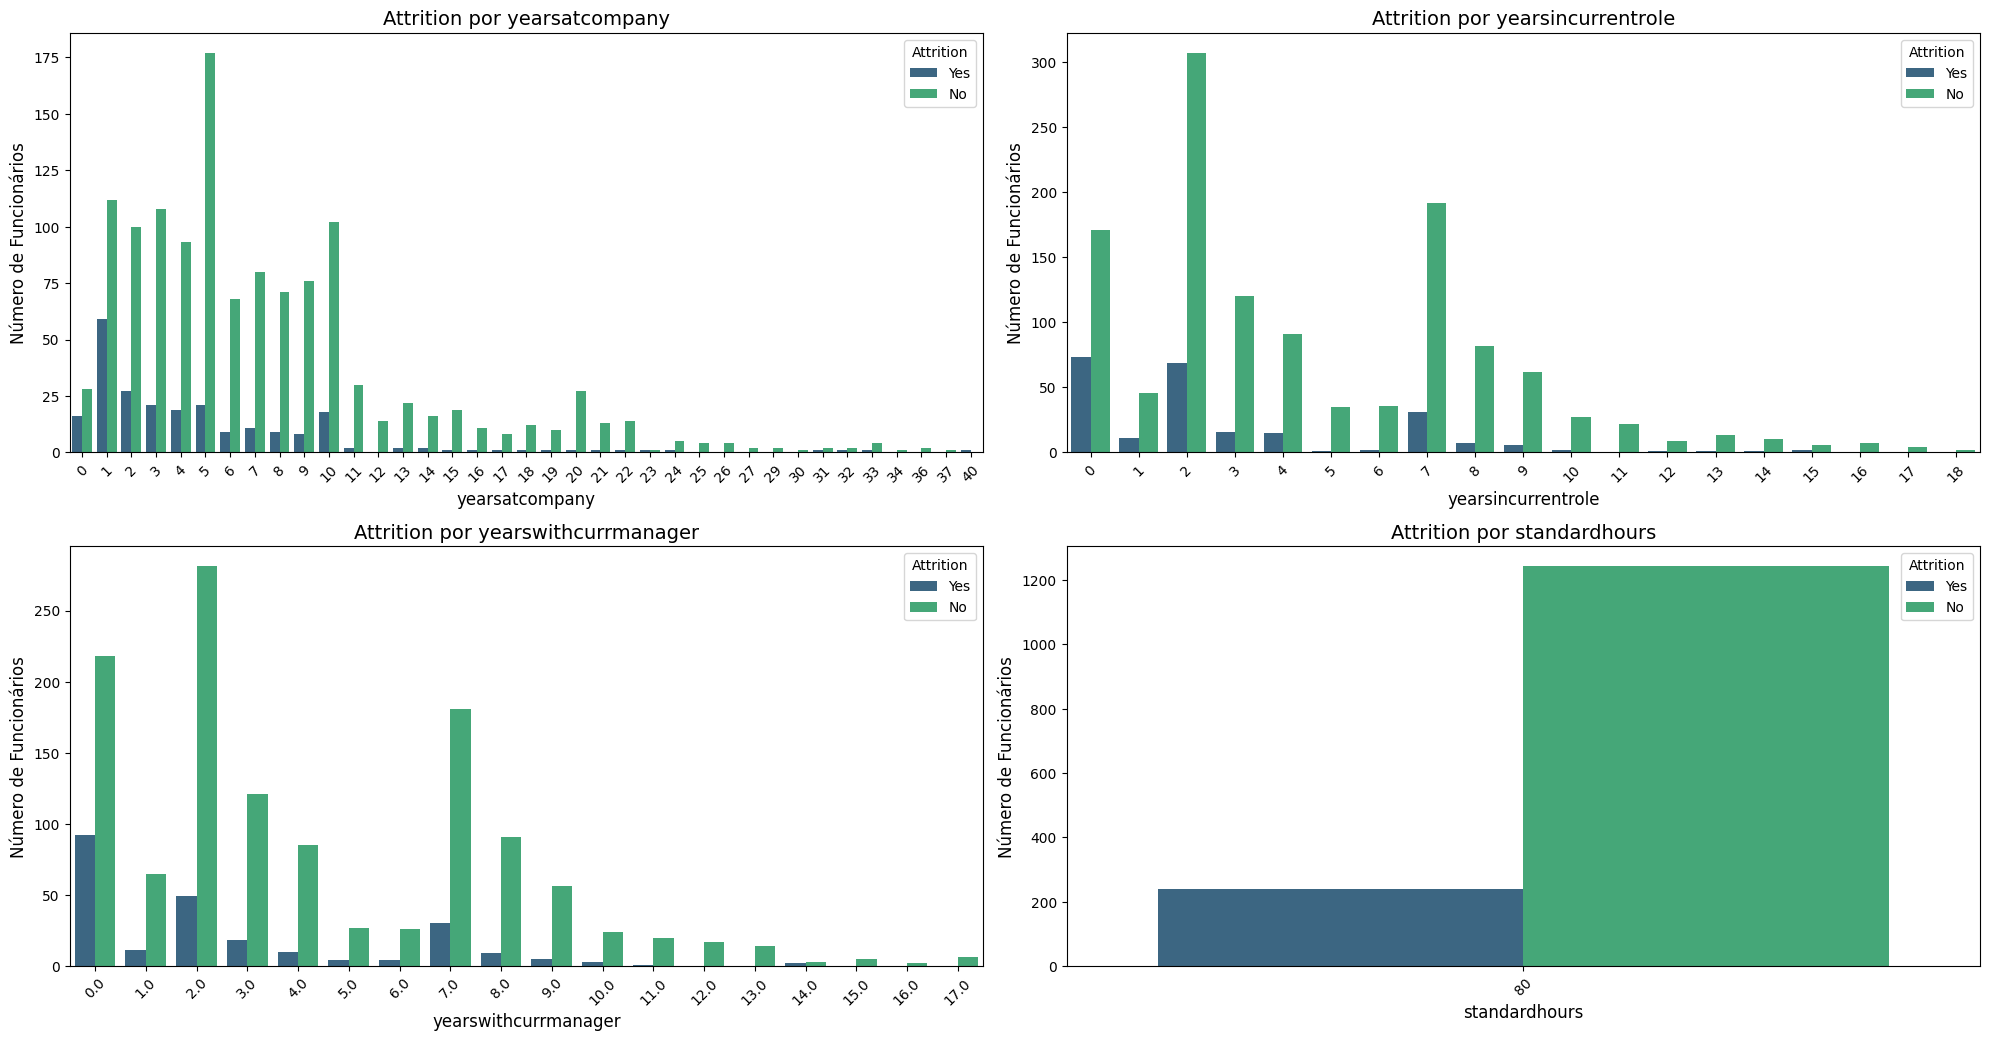

In [179]:
# Configurar o número de colunas e linhas para subplots
aux = emprego_cols[['yearsatcompany', 'yearsincurrentrole', 'yearswithcurrmanager', 'standardhours', 'attrition']]
columns = aux.columns
n_cols = 2  # Número de gráficos por linha
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calcular o número de linhas

# Criar a figura e os subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  # Ajustar tamanho da figura
axes = axes.flatten()  # Achatar os eixos para facilitar a iteração

# Iterar pelas colunas e criar gráficos
for i, x in enumerate(columns):
    if x == 'attrition':
        fig.delaxes(axes[i])
    else:
        sns.countplot(data=aux, x=x, hue='attrition', palette='viridis', ax=axes[i])
        axes[i].set_title(f'Attrition por {x}', fontsize=14)
        axes[i].set_xlabel(f'{x}', fontsize=12)
        axes[i].set_ylabel('Número de Funcionários', fontsize=12)
        axes[i].legend(title='Attrition', loc='upper right')
        axes[i].tick_params(axis='x', rotation=45)

# Remover gráficos vazios se houver menos colunas que subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Ajustar layout
plt.tight_layout()
plt.show()


### Problema 2: Desempenho e Produtividade

#### Relação entre horas extras e produtividade


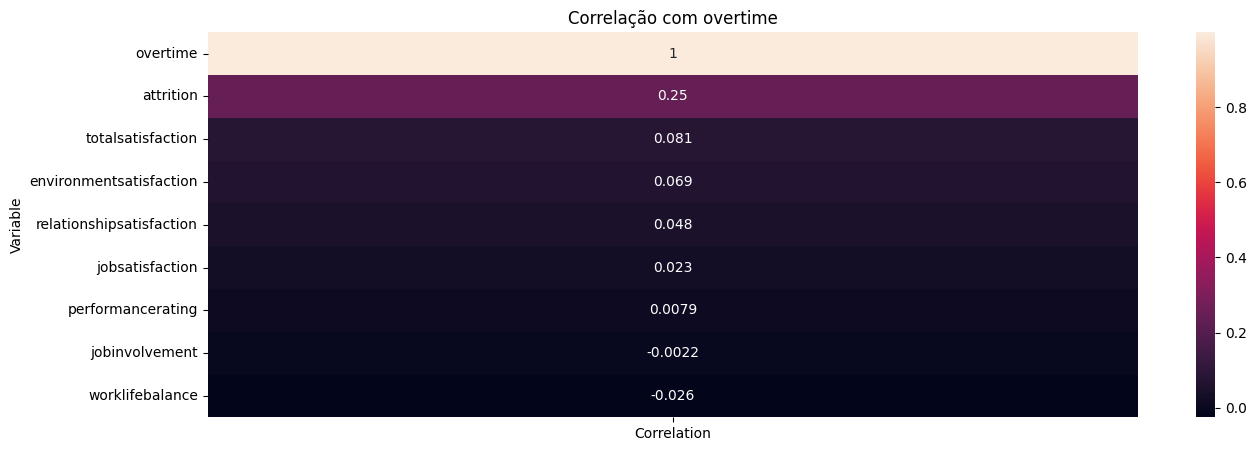

In [180]:
aux_df = df4[[ 'environmentsatisfaction', 'jobinvolvement','relationshipsatisfaction', 'worklifebalance', 'jobsatisfaction','performancerating', 'totalsatisfaction', 'overtime', 'attrition']]
aux_num = aux_df.select_dtypes(['int64', 'float64'])
aux_cat = aux_df.select_dtypes('object')

df4['overtime_encoded'] = df4['overtime'].apply(lambda x: 1 if x == 'Yes' else 0)

numerical_corr = {}
for col in aux_num:
    numerical_corr[col] = df4[col].corr(df4['overtime_encoded'], method='pearson')

categorical_corr = {}
for col in aux_cat:
    categorical_corr[col] = cramer_v(df4[col], df4['overtime'])


correlation_results = pd.DataFrame({
    'Variable': list(categorical_corr.keys()) + list(numerical_corr.keys()),
    'Correlation': list(categorical_corr.values()) + list(numerical_corr.values())
})

heatmap_data = correlation_results.set_index('Variable').sort_values(by=['Correlation'], ascending=False)


fig, ax = plt.subplots(figsize=(15,5)) 
plt.title('Correlação com overtime')
sns.heatmap(heatmap_data, annot=True, ax=ax);

Insights:

- Horas Extras contribui mais para o desligamento (25% de relação, ou seja, mais trabalho mais desligamento)
- Quem faz mais Horas Extras é mais satisfeito no trabalho. ( 0.081, força da relação é baixa)
- Quem faz mais Horas Extras não influencia no Envolvimento, Relação ou Perfomance Rating dos funcionarios. ( correlação proxima de 0%)
- Quem faz mais Horas Extras tem uma pode ter uma vida mais desequilibrada. ( -0.026, força da relação é baixa )

#### Diferenças de desempenho entre departamentos ou funções

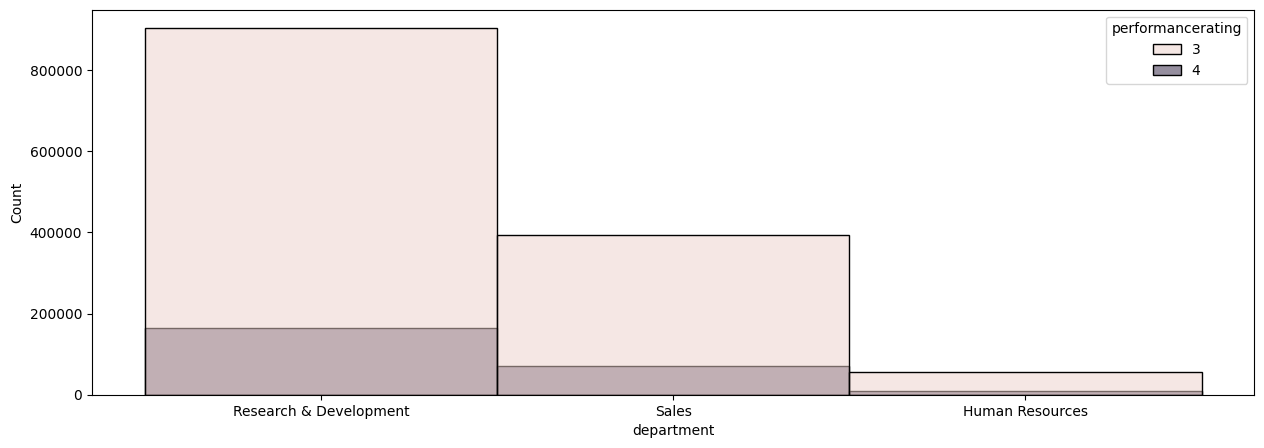

In [181]:
aux_df = pd.merge(satisfacao_desenvolvimento_cols[['performancerating', 'attrition']], emprego_cols[['department', 'attrition']]).drop(columns=['attrition'])
fig, ax = plt.subplots(figsize=(15,5)) 
sns.histplot(data=aux_df, x='department', hue='performancerating', ax=ax);

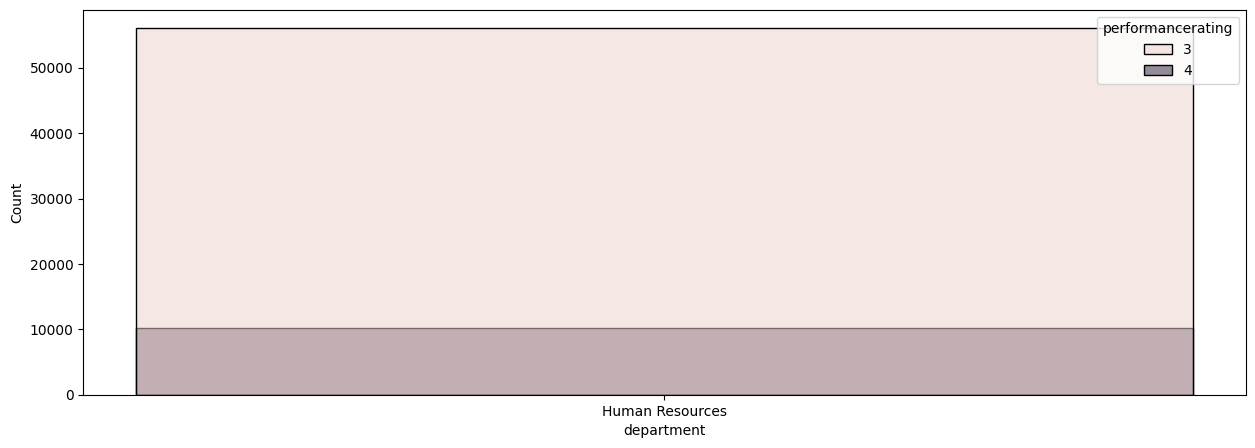

In [182]:
aux_df = pd.merge(satisfacao_desenvolvimento_cols[['performancerating', 'attrition']], emprego_cols[['department', 'attrition']]).drop(columns=['attrition'])
aux_df = aux_df[aux_df['department'] == 'Human Resources']
fig, ax = plt.subplots(figsize=(15,5)) 
sns.histplot(data=aux_df, x='department', hue='performancerating', ax=ax);

## Multivariate Analysis

### Numerical

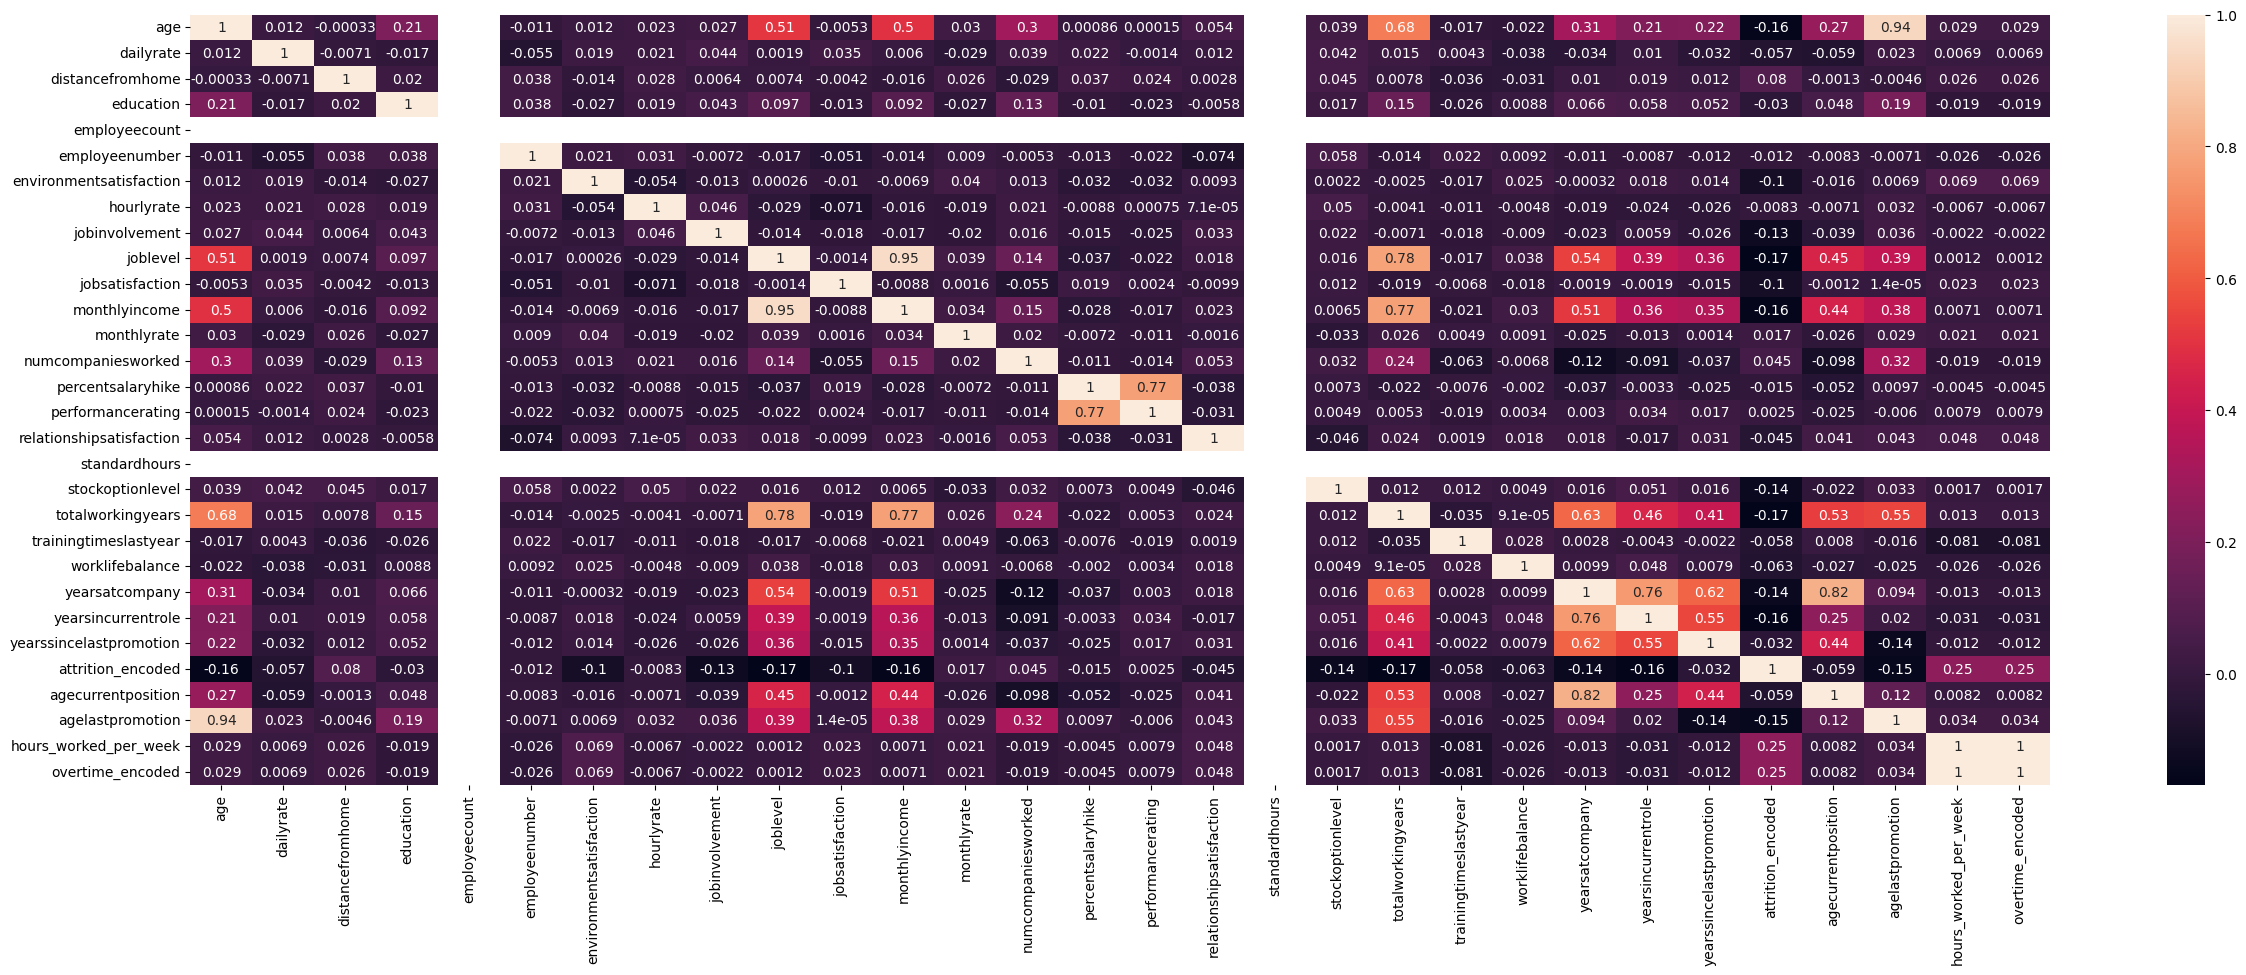

In [183]:
num_attrs = df4.select_dtypes('int64', 'float64')
correlation = num_attrs.corr( method='pearson' )
fig, ax = plt.subplots(figsize=(30,10)) 
sns.heatmap( correlation, annot=True, ax=ax );

Insights

- Quanto mais jovem, maior a probabilidade de rotatividade.
- O deslocamento tem um leve impacto na rotatividade.
- Quanto menor o envolvimento com o trabalho maior a rotatividade. ( levemente )
- Quanto menor o seu nivel hierarquico maior a rotatividade. ( levemente )
- Quanto menor o salario maior a rotatividade. ( levemente )

### Categorical

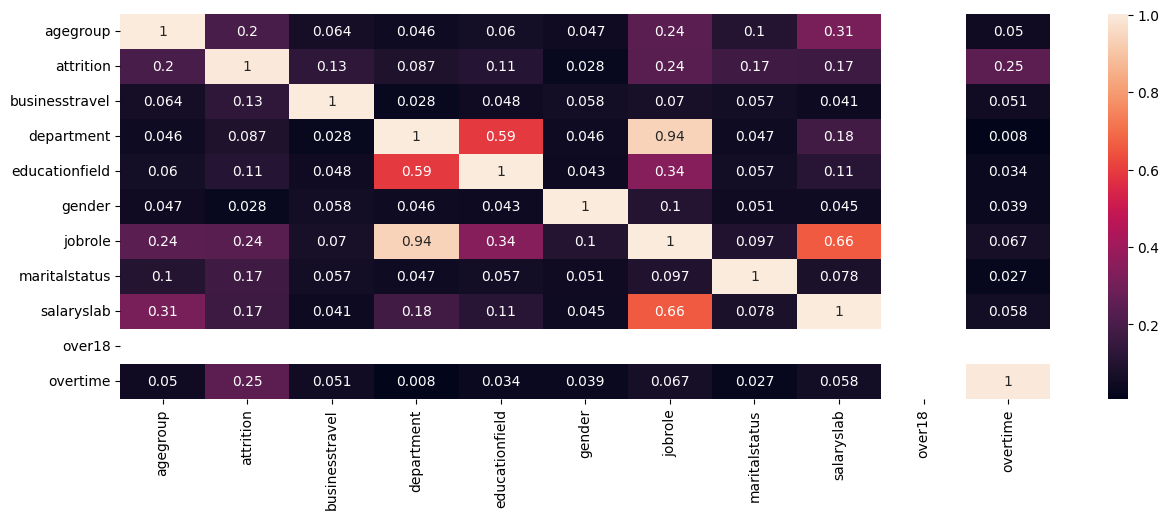

In [184]:
a = df4.select_dtypes(include='object').drop(columns=['empid'])

cramers_v_matrix = pd.DataFrame()

for col1 in a:
    for col2 in a:
        cramers_v_matrix.loc[col1, col2] = cramer_v(a[col1], a[col2])

cramers_v_matrix = cramers_v_matrix.astype(float)

fig, ax = plt.subplots(figsize=(15,5))  
sns.heatmap( cramers_v_matrix, annot=True, ax=ax);
## Creating new Features

# 6.0 Select Features

In [336]:
df5 = df4.copy()

In [337]:
# Selecionar variáveis categóricas e numéricas
categorical_cols = ['gender', 'maritalstatus', 'agegroup', 'department', 'educationfield', 'jobrole', 'overtime']
numerical_cols = df5.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remover a variável target das colunas
numerical_cols.remove('attrition_encoded')

# Cálculo do Cramer's V para variáveis categóricas
cramers_v_results = {}
for col in categorical_cols:
    cramers_v_results[col] = cramer_v(df5[col], df5['attrition_encoded'])

# Criar um DataFrame para armazenar os resultados de Cramer's V
cramers_v_df = pd.DataFrame(cramers_v_results.items(), columns=['Feature', 'Correlation'])
cramers_v_df['Method'] = 'Cramer\'s V'

# Cálculo da correlação para variáveis numéricas
numerical_corr = df5[numerical_cols + ['attrition_encoded']].corr()['attrition_encoded'].drop('attrition_encoded')

# Criar um DataFrame para armazenar os resultados de correlação
numerical_corr_df = pd.DataFrame({
    'Feature': numerical_corr.index,
    'Correlation': numerical_corr.values,
    'Method': 'Pearson'
})

# Combinar os resultados de Cramer's V e Pearson
correlation_results = pd.concat([cramers_v_df, numerical_corr_df]).sort_values(by='Correlation', ascending=False)
print(correlation_results)


                     Feature  Correlation      Method
32          overtime_encoded     0.248331     Pearson
28     hours_worked_per_week     0.248331     Pearson
6                   overtime     0.246370  Cramer's V
5                    jobrole     0.240464  Cramer's V
2                   agegroup     0.199881  Cramer's V
1              maritalstatus     0.174634  Cramer's V
30   training/yearsatcompany     0.152197     Pearson
4             educationfield     0.107361  Cramer's V
3                 department     0.087417  Cramer's V
2           distancefromhome     0.080006     Pearson
13        numcompaniesworked     0.045336     Pearson
0                     gender     0.028315  Cramer's V
12               monthlyrate     0.016585     Pearson
15         performancerating     0.002531     Pearson
7                 hourlyrate    -0.008252     Pearson
5             employeenumber    -0.012376     Pearson
14         percentsalaryhike    -0.014603     Pearson
3                  education

In [338]:
# Filtrar features com correlação maior que 0.1 (positiva ou negativa)
selected_features = correlation_results[abs(correlation_results['Correlation']) > 0.1]['Feature'].tolist()

df5_select_features = df5[selected_features]

In [339]:
scaler = StandardScaler()
df5_select_features[df5_select_features.select_dtypes('int64', 'float64').columns.tolist()] = scaler.fit_transform(df5_select_features[df5_select_features.select_dtypes('int64', 'float64').columns.tolist()])

df5_select_features['overtime'] = df5_select_features['overtime'].apply(lambda x: 1 if x == 'Yes' else 0)
df5_select_features = pd.get_dummies(df5_select_features, prefix=['jobrole'], columns=['jobrole'], dtype='int', drop_first=True)
df5_select_features = pd.get_dummies(df5_select_features, prefix=['agegroup'], columns=['agegroup'], dtype='int', drop_first=True)
df5_select_features = pd.get_dummies(df5_select_features, prefix=['maritalstatus'], columns=['maritalstatus'], dtype='int', drop_first=True)
df5_select_features = pd.get_dummies(df5_select_features, prefix=['educationfield'], columns=['educationfield'], dtype='int', drop_first=True)

In [340]:
# Substituir NaNs pela média de cada coluna
df5_select_features = df5_select_features.fillna(df5_select_features.mean())


# Substituir Inf e -Inf por valores máximos/mínimos da coluna
df5_select_features = df5_select_features.replace([np.inf, -np.inf], np.nan).fillna(0)


In [342]:
X = df5_select_features
y = df5['attrition_encoded']

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
17,salary/hoursworked,0.093597
13,monthlyincome,0.081421
10,agelastpromotion,0.063692
9,totalsatisfaction,0.062223
12,age,0.061775
16,totalworkingyears,0.060336
3,training/yearsatcompany,0.056632
7,yearsatcompany,0.048974
4,environmentsatisfaction,0.036719
11,yearswithcurrmanager,0.036558


In [352]:
selected_features = feature_importance[feature_importance['Importance'] > 0.01]
X_selected = df5_select_features[selected_features.Feature.tolist()]

# 7.0 Machine Learning

## Treino e Teste

In [346]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

print("Tamanhos do Conjunto de Treino e Teste:")
print(f"Treino: {X_train.shape}, Teste: {X_test.shape}")


Tamanhos do Conjunto de Treino e Teste:
Treino: (1036, 27), Teste: (444, 27)


## Regressão Logistica

In [347]:
# Treinar Regressão Logística
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Fazer previsões
y_pred_log_reg = log_reg.predict(X_test)

# Avaliar o modelo
print("Desempenho - Regressão Logística:")
print(classification_report(y_test, y_pred_log_reg))
print("Acurácia:", accuracy_score(y_test, y_pred_log_reg))


Desempenho - Regressão Logística:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       373
           1       0.68      0.30      0.41        71

    accuracy                           0.86       444
   macro avg       0.78      0.63      0.67       444
weighted avg       0.85      0.86      0.84       444

Acurácia: 0.8648648648648649


## Interpretação do modelo

In [353]:
# Obter os coeficientes do modelo
coefficients = pd.DataFrame({
    'Feature': X_selected.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)


                          Feature  Coefficient
18           maritalstatus_Single     0.915426
4                             age     0.822239
25   jobrole_Sales Representative     0.809393
20  jobrole_Laboratory Technician     0.635413
19        jobrole_Sales Executive     0.424756
23       educationfield_Marketing     0.403353
15               overtime_encoded     0.373861
16          hours_worked_per_week     0.373861
7                  yearsatcompany     0.319383
26          maritalstatus_Married     0.111274
14                       overtime     0.109050
6         training/yearsatcompany     0.092712
0              salary/hoursworked    -0.000127
5               totalworkingyears    -0.021359
1                   monthlyincome    -0.046017
22     jobrole_Research Scientist    -0.101451
11               stockoptionlevel    -0.124639
8         environmentsatisfaction    -0.153983
9            yearswithcurrmanager    -0.162635
12                jobsatisfaction    -0.197522
24   educatio